In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')
uploaded = files.upload()

Saving glass.data to glass.data


In [2]:
col_names =['Refractive_index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'class']
data = pd.read_csv("glass.data", delimiter=',', index_col=0)
data.columns = col_names
data.bfill(inplace=True)
X = data.drop('class', axis=1)
Y = data['class']
data.head()

,Refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
1,,,,,,,,,,
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

# Подмножества для hold-out
X_train, X_holdout, y_train, y_holdout = train_test_split(X, Y, test_size=0.3, random_state=12)

# Обучение модели
tree = DecisionTreeClassifier(max_depth=5, random_state=21, max_features=2)
tree.fit(X_train, y_train)

# Получение оценки hold-out
tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)
print("Hold-out accuracy:", accur)

Hold-out accuracy: 0.734375


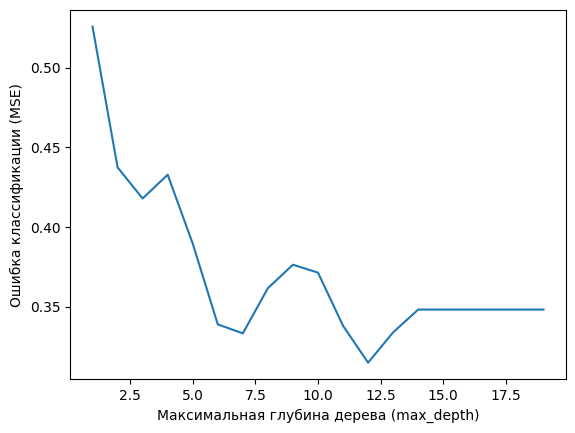

Значения классификационной ошибки для значений max_depth
0 - 0.5257575757575758
1 - 0.4374458874458875
2 - 0.4179653679653679
3 - 0.4329004329004329
4 - 0.38961038961038963
5 - 0.338961038961039
6 - 0.33333333333333326
7 - 0.36168831168831184
8 - 0.3764069264069265
9 - 0.37142857142857144
10 - 0.3380952380952381
11 - 0.31493506493506485
12 - 0.33398268398268394
13 - 0.3482683982683983
14 - 0.3482683982683983
15 - 0.3482683982683983
16 - 0.3482683982683983
17 - 0.3482683982683983
18 - 0.3482683982683983


In [4]:
from sklearn.model_selection import cross_val_score

# Значения параметра max_features
d_list = list(range(1, 20))

# Список для хранения значений точности
cv_scores = []

for d in d_list:
  tree = DecisionTreeClassifier(max_depth=d, random_state=21, max_features=3)
  tree.fit(X_train, y_train)
  scores = cross_val_score(tree, X, Y, cv=10, scoring='accuracy')
  cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Стоим график
plt.plot(d_list, MSE)
plt.xlabel('Максимальная глубина дерева (max_depth)')
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

print("Значения классификационной ошибки для значений max_depth")
for i in range(len(MSE)):
  print("{0} - {1}".format(i, MSE[i]))


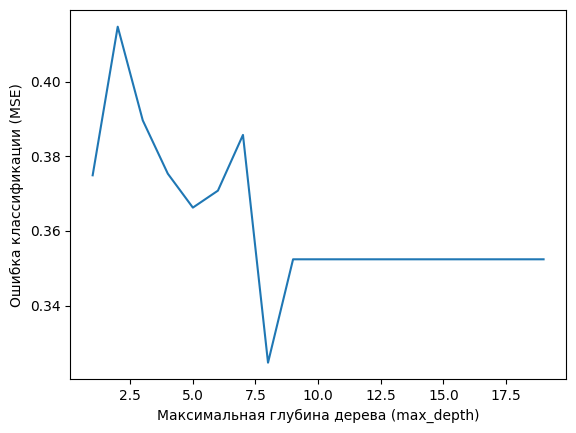

Значения классификационной ошибки для значений max_depth
0 - 0.37489177489177483
1 - 0.4147186147186147
2 - 0.38961038961038963
3 - 0.3753246753246754
4 - 0.36623376623376624
5 - 0.37077922077922076
6 - 0.3857142857142858
7 - 0.3246753246753247
8 - 0.35238095238095235
9 - 0.35238095238095235
10 - 0.35238095238095235
11 - 0.35238095238095235
12 - 0.35238095238095235
13 - 0.35238095238095235
14 - 0.35238095238095235
15 - 0.35238095238095235
16 - 0.35238095238095235
17 - 0.35238095238095235
18 - 0.35238095238095235
Оптимальные значения max_depth:  [8]


In [5]:
# Значения параметра max_features
f_list = list(range(1, 20))

# Список для хранения значений точности
cv_scores = []

for f in f_list:
  tree = DecisionTreeClassifier(max_depth=5, random_state=21, max_features=f)
  tree.fit(X_train, y_train)
  scores = cross_val_score(tree, X, Y, cv=10, scoring='accuracy')
  cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Стоим график
plt.plot(d_list, MSE)
plt.xlabel('Максимальная глубина дерева (max_depth)')
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
d_min = min(MSE)

# Пробуем найти остальные минимумы (если их несколько)
all_d_min = []
print("Значения классификационной ошибки для значений max_depth")
for i in range(len(MSE)):
  print("{0} - {1}".format(i, MSE[i]))
  if MSE[i] <= d_min:
    all_d_min.append(d_list[i])

# Печатаем все оптимальные значения глубины для модели
print("Оптимальные значения max_depth: ", all_d_min)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

string_class_names = {1 : "building_windows_float_processed", 2 : "building_windows_non_float_processed", 3 : "vehicle_windows_float_processed", 4 : "vehicle_windows_non_float_processed",  5 : "containers", 6 : "tableware", 7 : "headlamps"}
Y = Y.map(lambda x : string_class_names[x])
dtc = DecisionTreeClassifier(max_depth=5, random_state=21, max_features=2)

tree_params = {'max_depth': range(1, 20), 'max_features': range(1, 8)}
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(X_train, y_train)

print('\n')
print('Лучшее сочетание параметров:', tree_grid.best_params_)
print('Лучшие баллы cross validtion: ', tree_grid.best_score_)

# Генерируем графическое представление дерева
tree.export_graphviz(tree_grid.best_estimator_, feature_names=X.columns, class_names=Y.unique(), out_file='glass_tree.dot', filled=True, rounded=True)

Fitting 10 folds for each of 133 candidates, totalling 1330 fits


Лучшее сочетание параметров: {'max_depth': 6, 'max_features': 5}
Лучшие баллы cross validtion:  0.6919047619047619


In [7]:
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier(max_depth=3, random_state=21, max_features=2)

tree_params = {'max_depth': range(1, 20), 'max_features': range(1, 9)}
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(X_train, y_train)

print('\n')
print('Лучшее сочетание параметров:', tree_grid.best_params_)
print('Лучшие баллы cross validtion: ', tree_grid.best_score_)

# Генерируем графическое представление дерева
tree.export_graphviz(tree_grid.best_estimator_, feature_names=X.columns, class_names=Y.unique(), out_file='glass_tree.dot', filled=True, rounded=True)

Fitting 10 folds for each of 152 candidates, totalling 1520 fits


Лучшее сочетание параметров: {'max_depth': 6, 'max_features': 5}
Лучшие баллы cross validtion:  0.6919047619047619


In [ ]:
graph = files.upload()

Ниже представлено графическое отображение дерева решений

graphviz (1).svg

In [8]:
model = DecisionTreeClassifier(max_depth=tree_grid.best_params_['max_depth'], max_features=tree_grid.best_params_['max_features'])
model.fit(X_train, y_train)

res = model.predict(X_train.iloc[[0]])
print("Ожидаемый результат: {0}\nРезультат предсказания: {1}".format(y_train.iloc[[0]].iloc[0], res))

Ожидаемый результат: 1
Результат предсказания: [1]


In [9]:
Y.head()

,class
1,
2,building_windows_float_processed
3,building_windows_float_processed
4,building_windows_float_processed
5,building_windows_float_processed
6,building_windows_float_processed


In [10]:
string_class_names = {"building_windows_float_processed" : 1,"building_windows_non_float_processed" : 2, "vehicle_windows_float_processed" : 3, "vehicle_windows_non_float_processed" : 4,  "containers" : 5, "tableware" : 6, "headlamps" : 7}
Y_num = Y.map(lambda x : string_class_names[x])
Y_num.head()

X_train, X_test, y_train, y_test = train_test_split(X, Y_num, test_size=0.3)

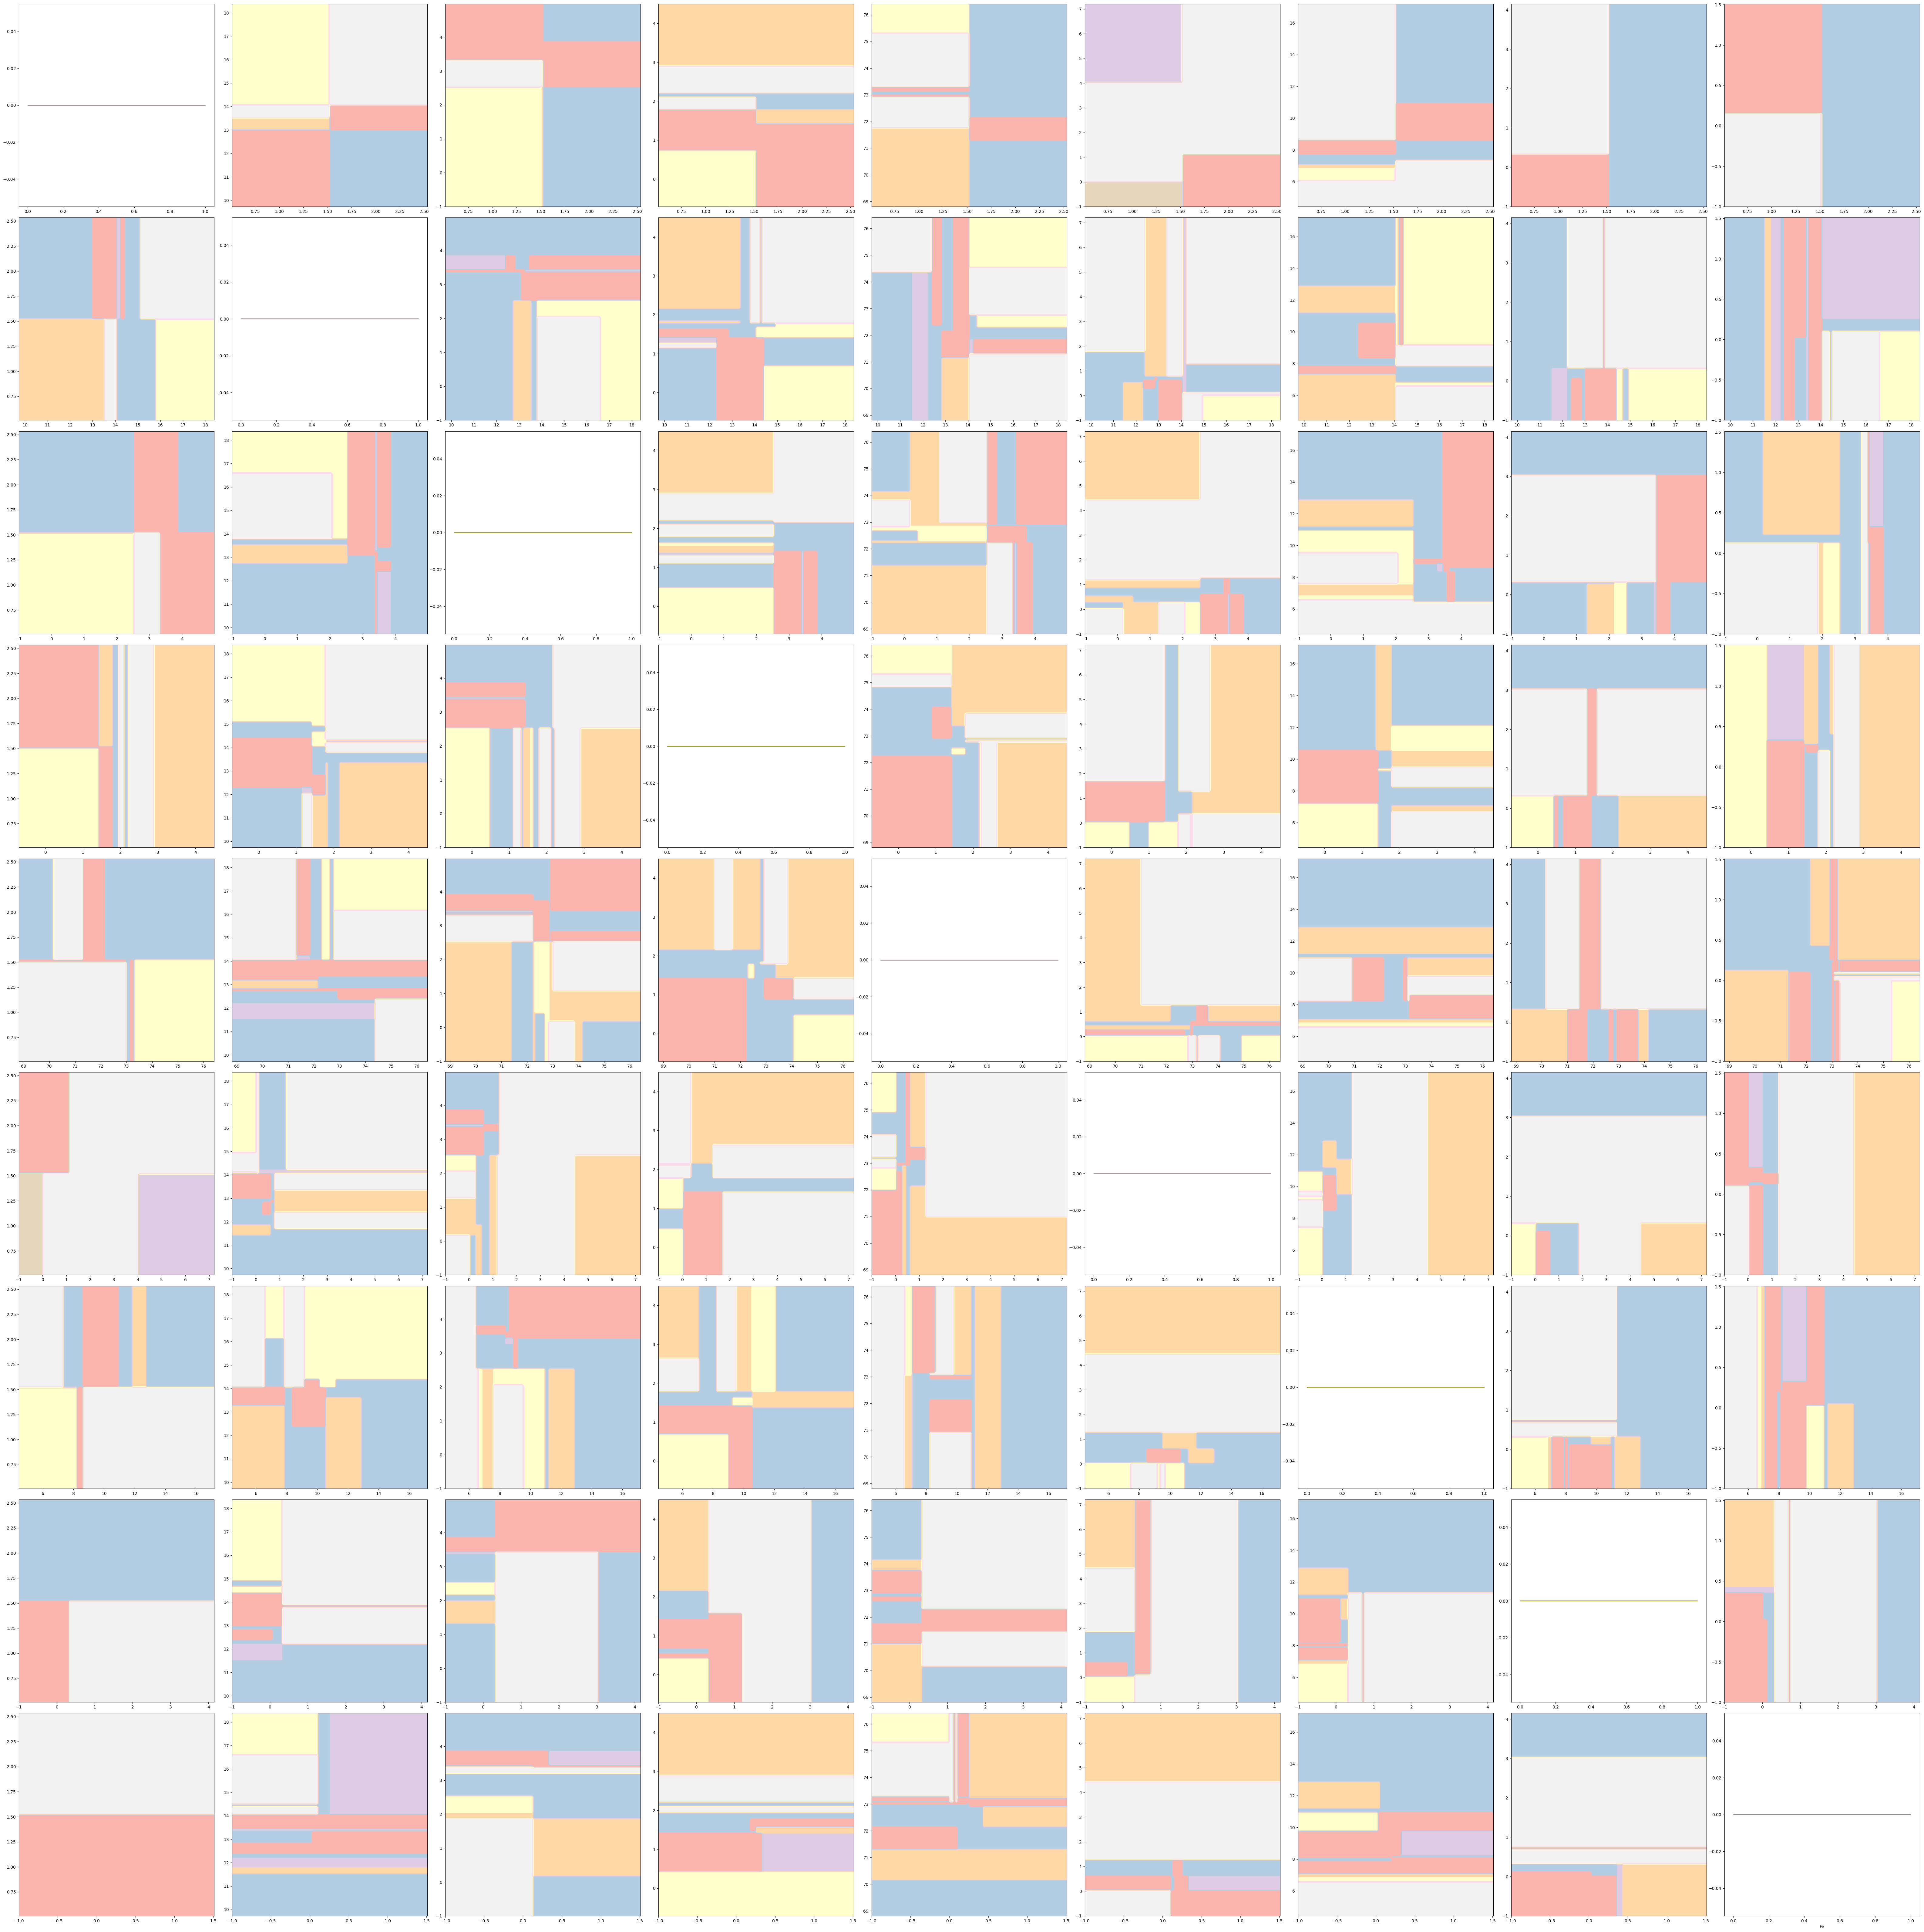

In [13]:
from sklearn.inspection import DecisionBoundaryDisplay
plot_markers = ['r*', 'g^', 'bo', 'c>','ms', 'y+']
answers = Y_num.unique()
f, places = plt.subplots(9, 9, figsize=(64, 64))

fmin = X.min() - 0.5
fmax = X.max() + 0.5
plot_step = 0.5

# Обходим все subplot
for i in range(0, 9):
  for j in range(0, 9):
    if (i != j):
      xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step), np.arange(fmin[j], fmax[j], plot_step))

      plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

      model = DecisionTreeClassifier(max_depth=5, random_state=21, max_features=8)
      model.fit(X_train.iloc[:, [i, j]].values, y_train.values)
      p = model.predict(np.c_[xx.ravel(), yy.ravel()])
      p = p.reshape(xx.shape)

      p = np.array(p, dtype=np.float64)

      # Построение решающих границ
      boundaries = DecisionBoundaryDisplay.from_estimator(model, X.iloc[:, [i,j]], ax = places[i, j], cmap='Pastel1', xlabel='', ylabel='', grid_resolution=100)

    # Обход всех классов
    for id_answer in range(len(answers)):
      idx = np.where(Y == answers[id_answer])

      if i == j:
        places[i, j].hist(X_train.iloc[idx].iloc[:, i], color = plot_markers[id_answer][0], histtype='step')

      else:
        places[i, j].plot(X_train.iloc[idx].iloc[:, i], X_train.iloc[idx].iloc[:, j], plot_markers[id_answer], label=answers[id_answer], markersize=4)

  if j == 0:
    places[i, j].set_ylabel(X.columns[j])
  if i == 8:
    places[i, j].set_xlabel(X.columns[i])